In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split

Read in the kaggle CSV's

*Feb 24:*

I've added `parse_dates` to columns with dates, to get date columns as `datetime` datatypes, otherwise they are objects. Learned this and came back to this code.

*Feb 26:* just placed the shape calls on the imported dataframes beside the initial `.head()` calls.

In [2]:
#read all the kaggle datasets with this competition
train = pd.read_csv('./train.csv', parse_dates = ['date'])
holiday_events = pd.read_csv('./holidays_events.csv')
transactions = pd.read_csv('./transactions.csv')
oil = pd.read_csv('./oil.csv')
stores = pd.read_csv('./stores.csv')
test = pd.read_csv('./test.csv')

#put them all in a list for ease of iteration
datasets = [train, test, holiday_events, transactions, oil, stores]

Printing the following as a way to look across all the datasets I've brought in

In [3]:

print("train dataset:{} \n".format(train.shape), train.head())
print("test dataset:{} \n".format(test.shape), test.head())
print("oil dataset:{} \n".format(oil.shape),  oil.head())
print("holiday dataset:{} \n".format(holiday_events.shape), holiday_events.head())
print("transactions datast:{} \n".format(transactions.shape), transactions.head())
print("stores dataset: {} \n".format(stores.shape, stores.head()))

train dataset:(3000888, 6) 
    id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0
test dataset:(28512, 5) 
         id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0
oil dataset:(1218, 2) 
          date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20
holiday dataset:(350, 6) 
          date     type  

In [5]:
for df in datasets:
    print(df.isna().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
date            0
store_nbr       0
transactions    0
dtype: int64
date           0
dcoilwtico    43
dtype: int64
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


In [6]:
train.info()
test.info()
holiday_events.info()
transactions.info()
oil.info()
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 co

In [7]:
print(train.loc['2013-01-01'])

KeyError: '2013-01-01'

In [8]:
total_sales_by_day = train['sales'].groupby('date').sum()
print(total_sales_by_day.head())

KeyError: 'date'

In [11]:
average_sales_by_day = train['sales'].groupby('date').mean()
average_sales_by_day.to_period('D')
print(average_sales_by_day.head())

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
Name: sales, dtype: float64


In [23]:
average_sales_by_day.index = pd.to_datetime(average_sales_by_day.index)
print(average_sales_by_day.head())

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
Name: sales, dtype: float64


In [1]:
plt.figure(figsize = (20, 10))
average_sales_by_day.plot(x = 'date')
plt.show()

NameError: name 'plt' is not defined

C:\Users\psych\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


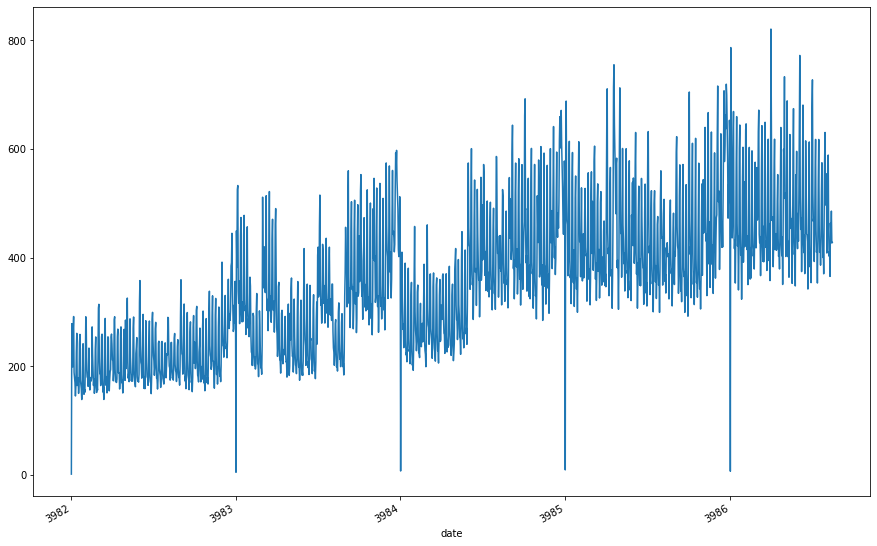

In [18]:
plt.figure(figsize = (15, 10))
average_sales_by_day.plot()
plt.show()

In [19]:
sns.pairplot(train)

Error in callback <function flush_figures at 0x000001F24007DA60> (for post_execute):


KeyboardInterrupt: 